In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [103]:
df = pd.read_csv('fraud.csv')

In [43]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [93]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
nameOrig_code     0
nameDest_code     0
dtype: int64

In [119]:
cor = df.corr()

In [120]:
cor

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

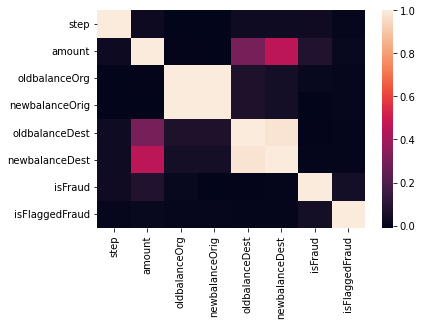

In [121]:
sns.heatmap(cor, 
        xticklabels=cor.columns,
        yticklabels=cor.columns)

In [122]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [123]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [124]:
df['nameOrig'].str[:1].value_counts()
df['nameDest'].str[:1].value_counts()

C    4211125
M    2151495
Name: nameDest, dtype: int64

<h2>Categorical variables study

In [77]:
df[['type', 'nameOrig', 'nameDest']]

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


In [90]:
# df_cat = df[['nameDest_code','nameOrig_code','type']]
# cat_encoder = OneHotEncoder()
# df_cat_encoded = cat_encoder.fit_transform(df_cat)
# df_cat_encoded

<6362620x8 sparse matrix of type '<class 'numpy.float64'>'
	with 19087860 stored elements in Compressed Sparse Row format>

Extracting 2 new columns by the digit in the start of the name columns

In [126]:
df['nameOrig_code'] = df['nameOrig'].str[:1]
df['nameDest_code'] = df['nameDest'].str[:1]

In [127]:
df[['nameDest_code','nameOrig_code']].value_counts()

nameDest_code  nameOrig_code
C              C                4211125
M              C                2151495
dtype: int64

turns out that originname starts with C for all rows

In [128]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [129]:
cat_cols = ['type', 'nameOrig_code', 'nameDest_code']


<h2>Numerical variables study:

In [130]:
df[df['isFlaggedFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_code,nameDest_code
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,C,C
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,C,C
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,C,C
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,C,C
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,C,C
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1,C,C
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,C,C
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,C,C
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1,C,C
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1,C,C


<h3>Studying Outliers:

In [131]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'nameOrig_code', 'nameDest_code'],
      dtype='object')

In [132]:
num_cols = ['step','oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']

In [133]:
for col in num_cols:
    Q1,Q3 = np.percentile(df[col], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = df[col][(df[col] > ul) | (df[col] < ll)]
    print(f'{col}:{len(outliers)}')

step:102688
oldbalanceOrg:1112507
newbalanceOrig:1053391
oldbalanceDest:786135
newbalanceDest:738527


In [135]:
df.drop(['nameOrig','nameDest'],axis = 1, inplace=True)

In [136]:
X = df.drop('isFraud',axis = 1)
X = X.iloc[:,:].values
y = df.isFraud.values

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42,stratify=df['isFlaggedFraud'])

<h2>Data preprocessing for modeling:

In [138]:
full_pipeline = ColumnTransformer([
 ("num", StandardScaler(), num_cols),
 ("cat", OneHotEncoder(), cat_cols),
 ])


In [140]:
df_prepared = full_pipeline.fit_transform(df)